# Retail Analysis with Walmart Data


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import dates
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
walmart = pd.read_csv("Walmart_Store_sales.csv")

## Business Understanding

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas.

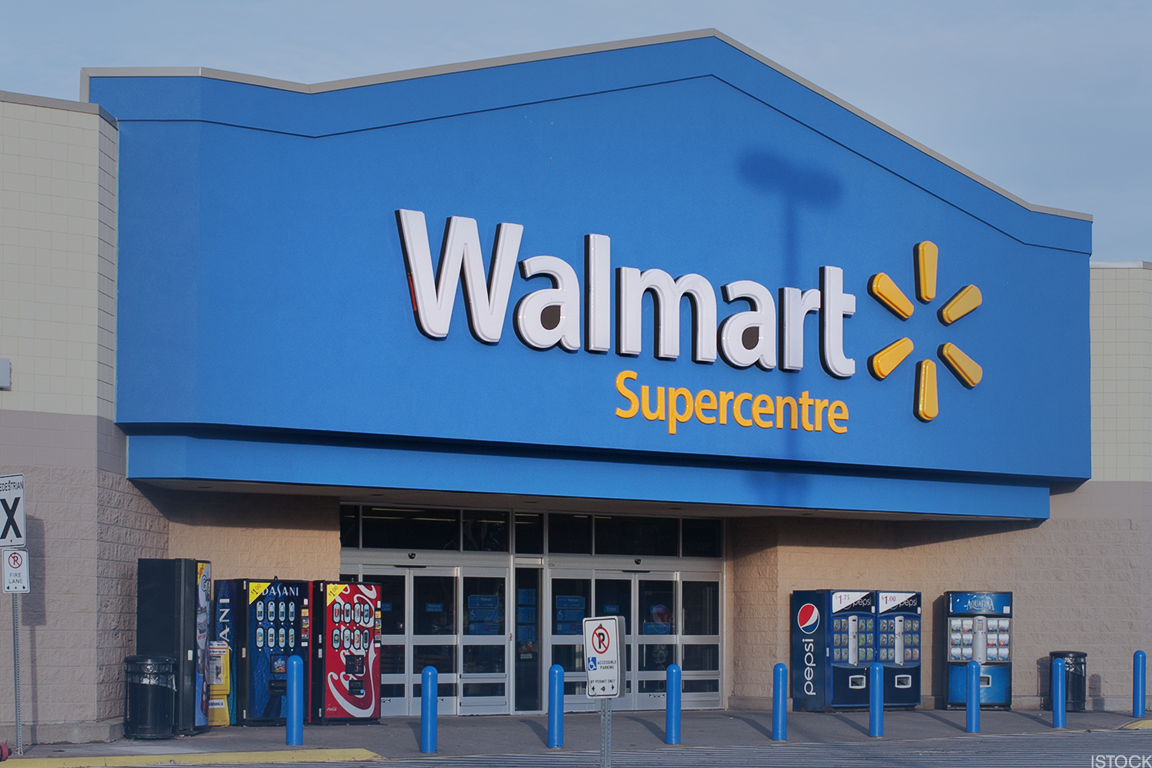


**In this project,we focused to answer the following questions:**

Analysis Tasks

Basic Statistics tasks

- Which store has maximum sales

- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

- Which store/s has good quarterly growth rate in Q3’2012

- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

- Provide a monthly and semester view of sales in units and give insights

Statistical Model

- For Store 1 – Build  prediction models to forecast demand

- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating new variable.

## Data Preparation

In [3]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Convert date to datetime format and show dataset information
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
#finding missing values
walmart.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Splitting Date and create new columns (Day, Month, and Year)
# Change dates into days by creating new variable.

walmart['Day'] = pd.DatetimeIndex(walmart['Date']).day
walmart['Month'] = pd.DatetimeIndex(walmart['Date']).month
walmart['Year'] = pd.DatetimeIndex(walmart['Date']).year

walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


### Q.1: Which store has maximum sales ?


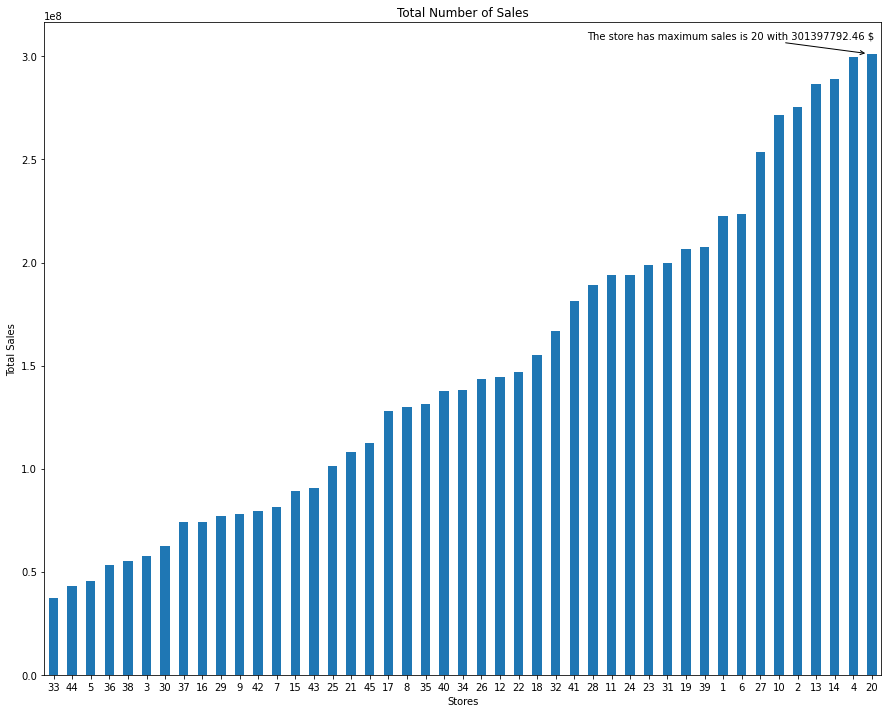

In [7]:
total_sales = walmart.groupby('Store')['Weekly_Sales'].sum().sort_values()

plt.figure(figsize=(15,12))
ax = total_sales.plot(kind='bar')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

plt.xticks(rotation = 0)
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Total Number of Sales')
plt.show()


#Insights:
#         We can clearly see that store number 20 has the maximum sales (30,13,97,792.46 $)

### Q.2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation ?

In [8]:
walmart_std = pd.DataFrame(walmart.groupby('Store')['Weekly_Sales'].std().sort_values(ascending = False))
walmart_std['Weekly_Sales'] = round(walmart_std['Weekly_Sales'],0)

In [9]:
print(f'The maximum standard deviation is in store number {walmart_std.index[0]} with {(walmart_std.head(1).Weekly_Sales[walmart_std.head(1).index[0]])}$')

The maximum standard deviation is in store number 14 with 317570.0$


In [10]:
walmart_std.head()

,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0
4,266201.0
13,265507.0


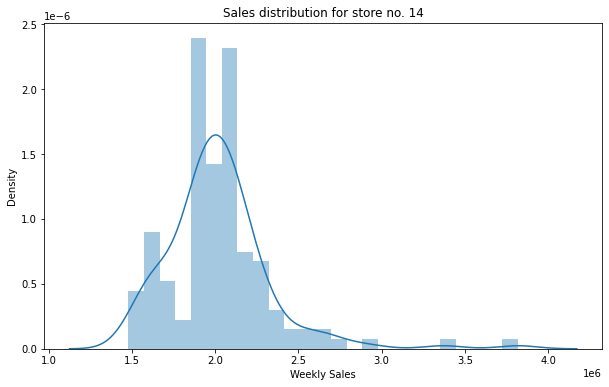

In [11]:
plt.figure(figsize=(10,6))

sns.distplot(walmart[walmart['Store'] == walmart_std.index[0]]['Weekly_Sales'])
plt.title("Sales distribution for store no. 14")
plt.xlabel("Weekly Sales")
plt.show()

In [12]:
#finding out the coefficient of mean to standard deviation
walmart_coeff = pd.DataFrame(walmart.groupby('Store')['Weekly_Sales'].std() / walmart.groupby('Store')['Weekly_Sales'].mean())
walmart_coeff = walmart_coeff.rename(columns={'Weekly_Sales':"Coefficient"})
walmart_coeff

,Coefficient
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


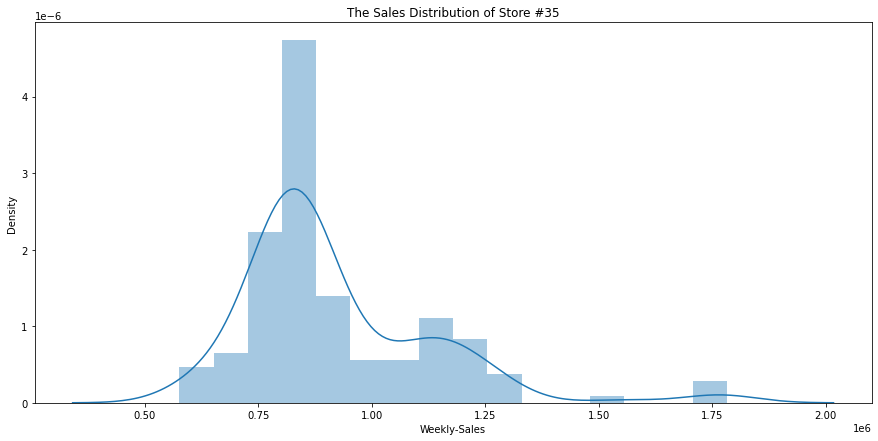

In [13]:
#Distribution of Store which has maximum co-efficient of mean to standard deviation
walmart_coeff_max = walmart_coeff.sort_values(by='Coefficient',ascending=False)

#plot properties
plt.figure(figsize=(15,7))
sns.distplot(walmart[walmart['Store'] == walmart_coeff_max.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(walmart_coeff_max.head(1).index[0]));
plt.xlabel('Weekly-Sales')
plt.show()


### Q3: Which store/s has good quarterly growth rate in Q3’2012

In [14]:
Q3 = walmart[(walmart['Date'] > '2012-07-01') & (walmart['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

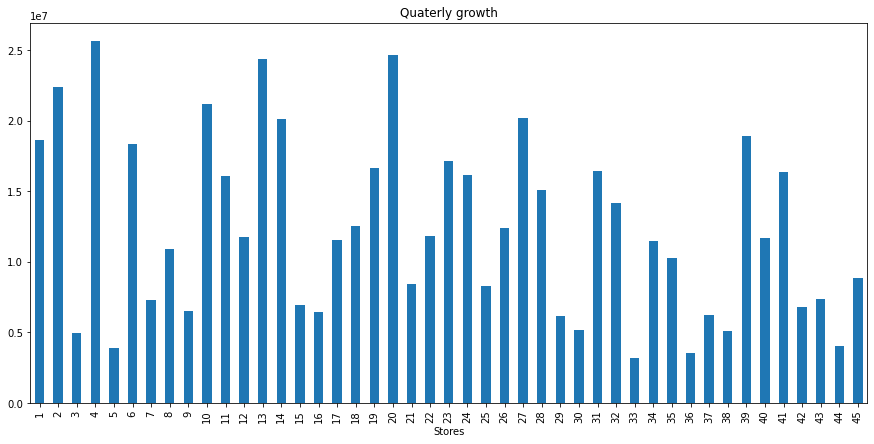

In [15]:
plt.figure(figsize=(15,7))
Q3.plot(kind = 'bar')
plt.title("Quaterly growth")
plt.xlabel('Stores')
plt.show()

In [16]:
print(f'Insight:\nStore with good quarterly growth rate in Q3’2012 {Q3.idxmax()} with {Q3.max()}$')

Insight:
Store with good quarterly growth rate in Q3’2012 4 with 25652119.35$


### Q.4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

**Holiday Events:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

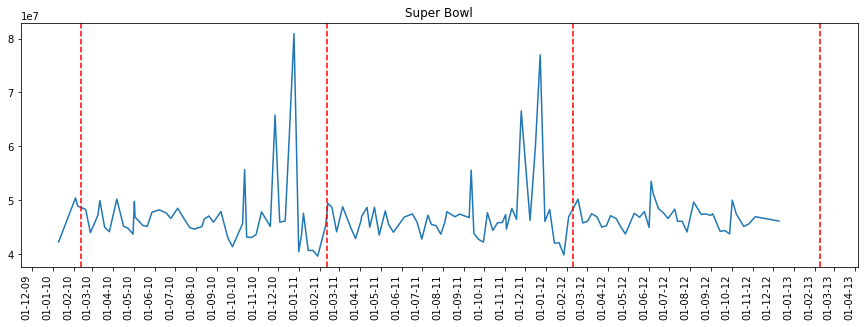

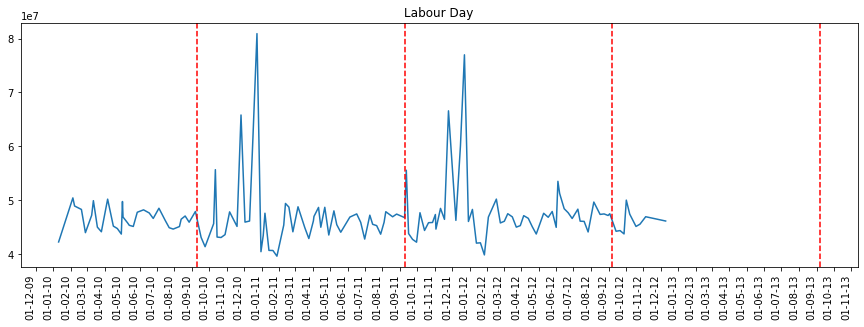

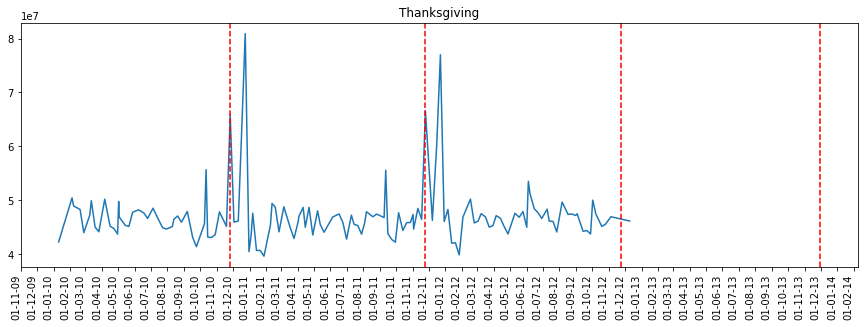

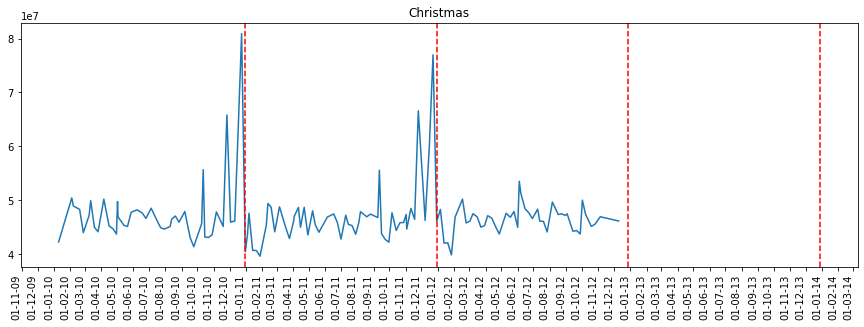

In [17]:
def plot_line(walmart,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(walmart['Date'],walmart['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    
    plt.title(holiday_label)
    x_dates = walmart['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()
    
    
total_sales = walmart.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012', '8-2-2013']
Labour_Day = ['10-9-2010', '9-9-2011', '7-9-2012', '6-9-2013']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']


plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')


**The sales increased during thanksgiving. And the sales decreased during christmas.**

In [18]:
walmart.loc[walmart.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,2,11,2011


<AxesSubplot:title={'center':'Yearly sales during Christmas holiday'}, xlabel='Year'>

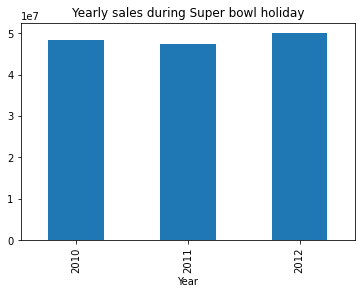

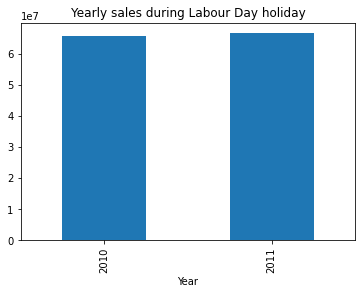

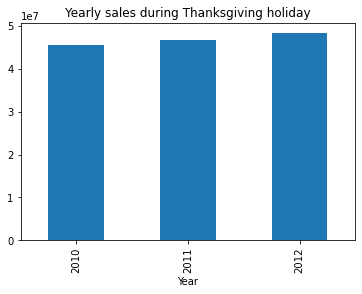

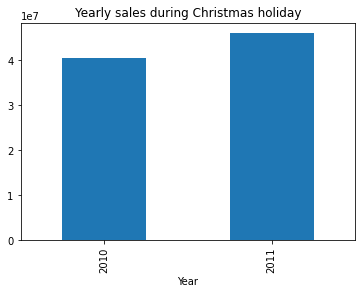

In [19]:
Super_bowl_df = pd.DataFrame(walmart.loc[walmart.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(walmart.loc[walmart.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(walmart.loc[walmart.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(walmart.loc[walmart.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_bowl_df.plot(kind='bar',legend = False,title = "Yearly sales during Super bowl holiday")
Thanksgiving_df.plot(kind='bar',legend = False,title = "Yearly sales during Labour Day holiday")
Labour_Day_df.plot(kind='bar',legend = False,title = "Yearly sales during Thanksgiving holiday")
Christmas_df.plot(kind='bar',legend = False,title = "Yearly sales during Christmas holiday")


### Q5: Provide a monthly and semester view of sales in units and give insights

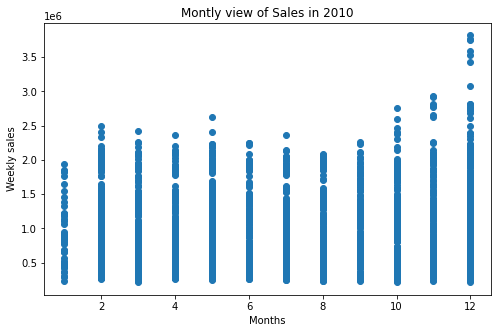

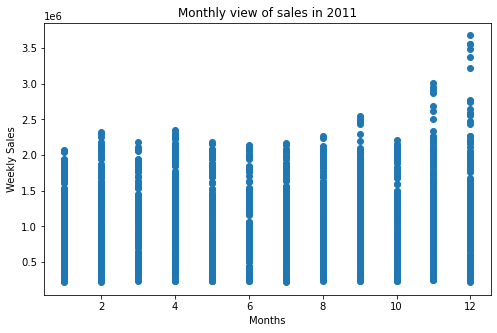

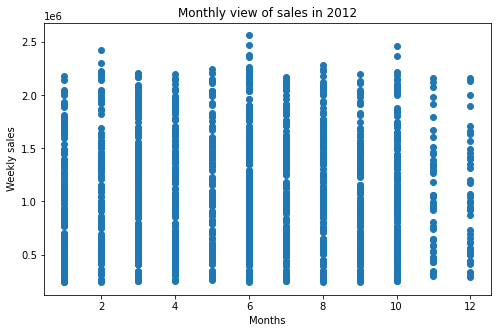

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(walmart[walmart.Year == 2010]['Month'],walmart[walmart.Year == 2010]["Weekly_Sales"])
plt.title('Montly view of Sales in 2010')
plt.xlabel('Months')
plt.ylabel('Weekly sales')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(walmart[walmart.Year == 2011]['Month'],walmart[walmart.Year == 2011]['Weekly_Sales'])
plt.title('Monthly view of sales in 2011')
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(8,5))
plt.scatter(walmart[walmart.Year == 2012]['Month'], walmart[walmart.Year == 2012]['Weekly_Sales'])
plt.title("Monthly view of sales in 2012")
plt.xlabel("Months")
plt.ylabel("Weekly sales")
plt.show()

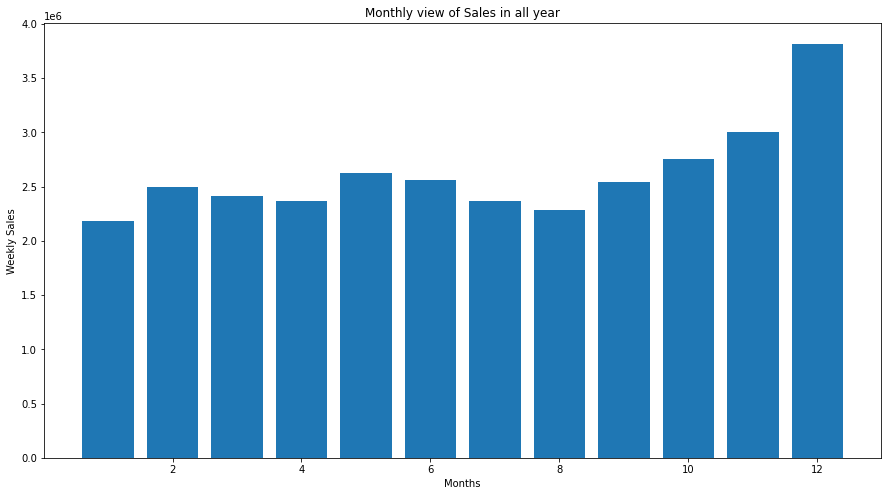

In [21]:
#Monthly view of Sales in all year

plt.figure(figsize=(15,8))
plt.bar(walmart['Month'],walmart['Weekly_Sales'])
plt.xlabel("Months")
plt.ylabel('Weekly Sales')
plt.title('Monthly view of Sales in all year')
plt.show()

<Figure size 864x576 with 0 Axes>

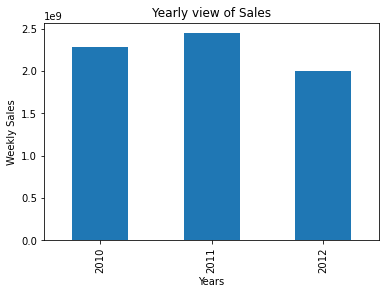

In [22]:
plt.figure(figsize=(12,8))
walmart.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar',legend=False)
plt.title('Yearly view of Sales')
plt.xlabel('Years')
plt.ylabel('Weekly Sales')
plt.show()


### Build prediction models to forecast demand (Modeling)

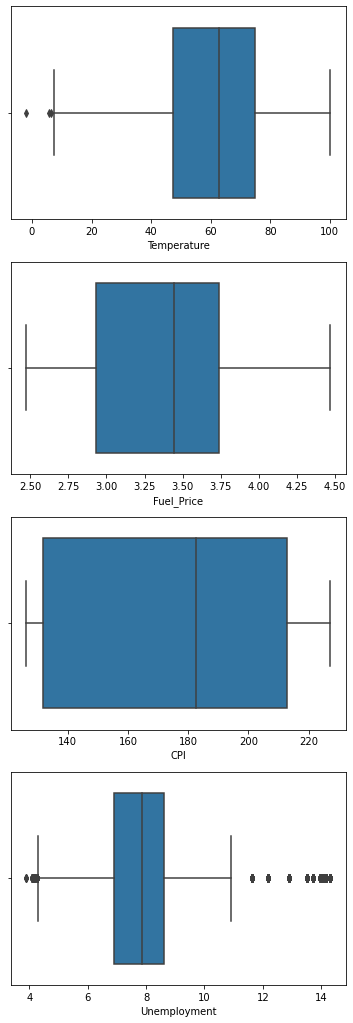

In [23]:
fig, axs = plt.subplots(4, figsize=(6,18))
X = walmart[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart[column],ax=axs[i])

In [24]:
#To avoid misleading interpretations, we are removing outliers

data_new = walmart[(walmart['Temperature'] > 10) & (walmart['Unemployment']>4.5) & (walmart['Unemployment'] < 10)]
data_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


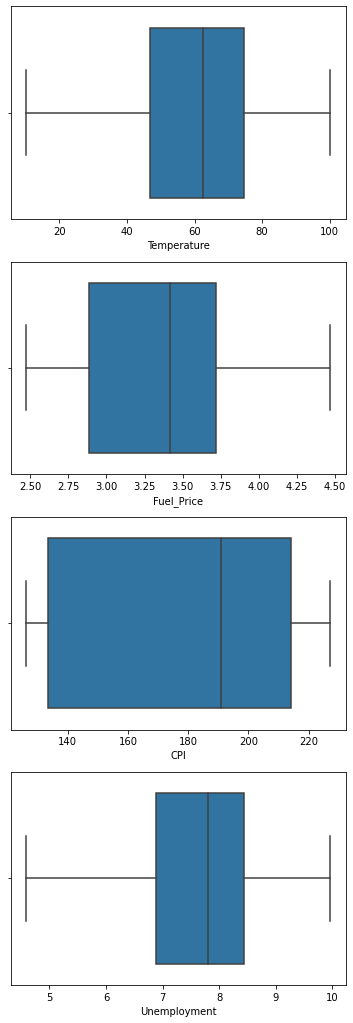

In [25]:
#againing checking if any outliers are left
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax = axs[i])

### Build Model

In [26]:
#importing libraries.
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [27]:
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

#spliting train and test data in the ratio of 80-20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Accuracy: 13.480535543049399


<AxesSubplot:ylabel='Weekly_Sales'>

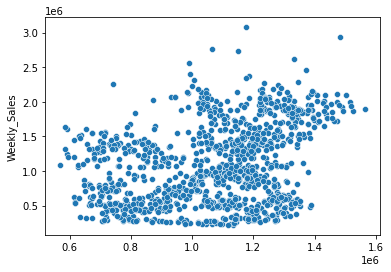

In [28]:
#Linear Regression Model

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)

sns.scatterplot(y_pred,y_test)

Accuracy: 94.39214614235169
Accuracy: 94.39142843048627
Accuracy: 94.65911072238775
Accuracy: 94.68805788176195
Accuracy: 94.6298702992592
Accuracy: 94.45889016090806
Accuracy: 94.56473835851409
Accuracy: 94.50980486471579
Accuracy: 94.48102775310721
Accuracy: 94.53547691095679
Accuracy: 94.41813031185163
Accuracy: 94.47928079871897
Accuracy: 94.50533399463154
Accuracy: 94.55683949819237
Accuracy: 94.50234851251889
Accuracy: 94.50163750040922


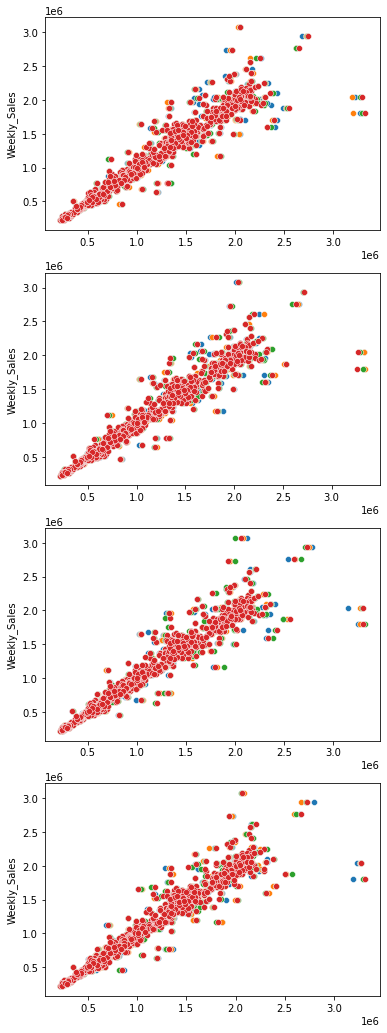

In [35]:
fig, axs = plt.subplots(4,figsize=(6,18))
for n in range(100,401,100):
    for i in range(0,4):
        rfr = RandomForestRegressor(n_estimators = n, max_depth = 15, n_jobs= 5 )
        rfr.fit(X_train,y_train)
        y_pred=rfr.predict(X_test)
        print('Accuracy:',rfr.score(X_test, y_test)*100)
        sns.scatterplot(y_pred, y_test,legend=True, ax=axs[i]);


Accuracy: 94.54027987887416


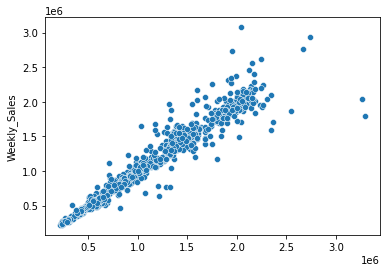

In [36]:
rfr = RandomForestRegressor(n_estimators = 400, max_depth = 15, n_jobs= 5 )
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
sns.scatterplot(y_pred, y_test);
